In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
df=pd.read_csv("bci05.csv") #reading the file

In [3]:
df=df.loc[df.status=="A"] #selecting only the species present
speci=pd.unique(df["sp"]) #vector of all speices namE

In [84]:
x=df["gx"]                #dividing in 800 subplot
y=df["gy"]
df['subplot']=((x//25)+1)+(((y//25))*40)

In [85]:
print(df)

           tag      sp     gx     gy    dbh  pom    date codes status  subplot
0       105951  ACACME  610.0  104.7  119.0    1  8924.0     M      A    185.0
1       132160  ACACME  534.8  241.3  116.0    1  8922.0     *      A    382.0
4       191542  ACACME  282.7  177.5   75.0    1  8825.0     *      A    292.0
5       269064  ACACME   84.2   74.8   21.0    1  8783.0     *      A     84.0
6       272540  ACACME  149.9  389.8   20.0    1  8833.0     *      A    606.0
7       422989  ACACME  450.8  216.8   21.0    1  8890.0     *      A    339.0
8       430127  ACACME  606.4  105.6   43.0    1  8924.0     *      A    185.0
9       430131  ACACME  606.1  103.1   26.0    1  8924.0     *      A    185.0
10      430132  ACACME  606.3  102.4   59.0    1  8924.0     *      A    185.0
11      530056  ACACME  612.6  107.6   51.0    1  8924.0     *      A    185.0
12      707243  ACACME  141.4  190.1   25.0    1  8826.0     *      A    286.0
13      718100  ACACME  362.1   70.8   14.0    1  88

In [78]:
sub=df["subplot"]    #check 
np.max(sub)

800.0

In [79]:
j=np.arange(1,800.01,1)
area=np.array([])
inc=np.array([])
for i in j:
    med=np.array([])
    a=np.arange(0,800.01-i,i)
    for k in a:
        sub=df.loc[df["subplot"]>k] 
        sub=sub.loc[sub["subplot"]<=k+i]
        sp=np.unique(sub["sp"])
        med=np.append(med,len(sp))
    area=np.append(area,i/800)
    inc=np.append(inc,np.mean(med))    

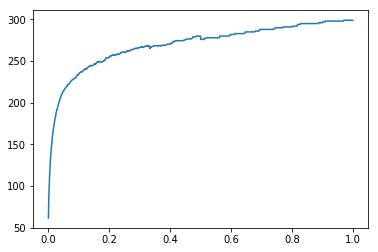

In [90]:
plt.plot(area,inc)

In [144]:
from scipy.optimize import curve_fit

In [145]:
>>> def func(x, m):
    s=299    
    return s*(1-(np.log(m*(1-x)+x))/np.log(m))

In [146]:
popt, pcov = curve_fit(func,area,inc,bounds=(0,1))

In [147]:
popt

array([4.87333985e-05])

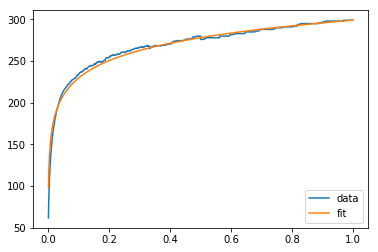

In [148]:
plt.plot(area,inc,area, func(area, *popt))
plt.legend(("data","fit"),loc="lower right")

In [130]:
np.savetxt("area.txt",area)

In [131]:
np.savetxt("inc.txt",inc)

In [143]:
np.savetxt("areainc.txt",(area,inc),delimiter="\t")

In [139]:
area

array([0.00125, 0.0025 , 0.00375, 0.005  , 0.00625, 0.0075 , 0.00875,
       0.01   , 0.01125, 0.0125 , 0.01375, 0.015  , 0.01625, 0.0175 ,
       0.01875, 0.02   , 0.02125, 0.0225 , 0.02375, 0.025  , 0.02625,
       0.0275 , 0.02875, 0.03   , 0.03125, 0.0325 , 0.03375, 0.035  ,
       0.03625, 0.0375 , 0.03875, 0.04   , 0.04125, 0.0425 , 0.04375,
       0.045  , 0.04625, 0.0475 , 0.04875, 0.05   , 0.05125, 0.0525 ,
       0.05375, 0.055  , 0.05625, 0.0575 , 0.05875, 0.06   , 0.06125,
       0.0625 , 0.06375, 0.065  , 0.06625, 0.0675 , 0.06875, 0.07   ,
       0.07125, 0.0725 , 0.07375, 0.075  , 0.07625, 0.0775 , 0.07875,
       0.08   , 0.08125, 0.0825 , 0.08375, 0.085  , 0.08625, 0.0875 ,
       0.08875, 0.09   , 0.09125, 0.0925 , 0.09375, 0.095  , 0.09625,
       0.0975 , 0.09875, 0.1    , 0.10125, 0.1025 , 0.10375, 0.105  ,
       0.10625, 0.1075 , 0.10875, 0.11   , 0.11125, 0.1125 , 0.11375,
       0.115  , 0.11625, 0.1175 , 0.11875, 0.12   , 0.12125, 0.1225 ,
       0.12375, 0.12